In [ ]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import imghdr

Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/My Drive/Colab Notebooks/Dataset/Dataset/'
image_extensions = [".png", ".jpg", ".jpeg"]
img_type_accepted_by_tf = ["jpg", "jpeg", "png", "gif", "bmp"]

Mounted at /content/drive


In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(227,227),batch_size=16)
print(data.class_names)
class_names=data.class_names

Found 679 files belonging to 4 classes.
['Bolt', 'Carl', 'Olaf', 'Woody']


In [ ]:
data_iterator = data.as_numpy_iterator()
print("data_iterator", data_iterator)

data_iterator <tensorflow.python.data.ops.dataset_ops.NumpyIterator object at 0x7aad5b562b80>


In [ ]:
batch = data_iterator.next()
print("batch", batch)

batch (array([[[[0.00000000e+00, 1.12222743e+00, 1.56348526e-01],
         [0.00000000e+00, 1.03640163e+00, 1.26223350e+00],
         [0.00000000e+00, 1.07369149e+00, 7.81744301e-01],
         ...,
         [0.00000000e+00, 1.06068563e+00, 9.49328423e-01],
         [0.00000000e+00, 1.09794986e+00, 4.69169438e-01],
         [0.00000000e+00, 1.01213717e+00, 1.57488763e+00]],

        [[5.40308380e+00, 6.80616760e+00, 2.37047291e+01],
         [5.40308380e+00, 6.80616760e+00, 2.44673119e+01],
         [5.40308380e+00, 6.80616760e+00, 2.41359825e+01],
         ...,
         [2.59691620e+00, 4.59691620e+00, 1.74148598e+01],
         [2.59691620e+00, 4.59691620e+00, 1.73030663e+01],
         [2.59691620e+00, 4.59691620e+00, 1.75605049e+01]],

        [[5.00000000e+00, 6.00000000e+00, 2.54635601e+01],
         [6.00000000e+00, 7.00000000e+00, 2.73119678e+01],
         [6.00000000e+00, 7.00000000e+00, 2.69433479e+01],
         ...,
         [3.00000000e+00, 5.00000000e+00, 1.76718063e+01],
   

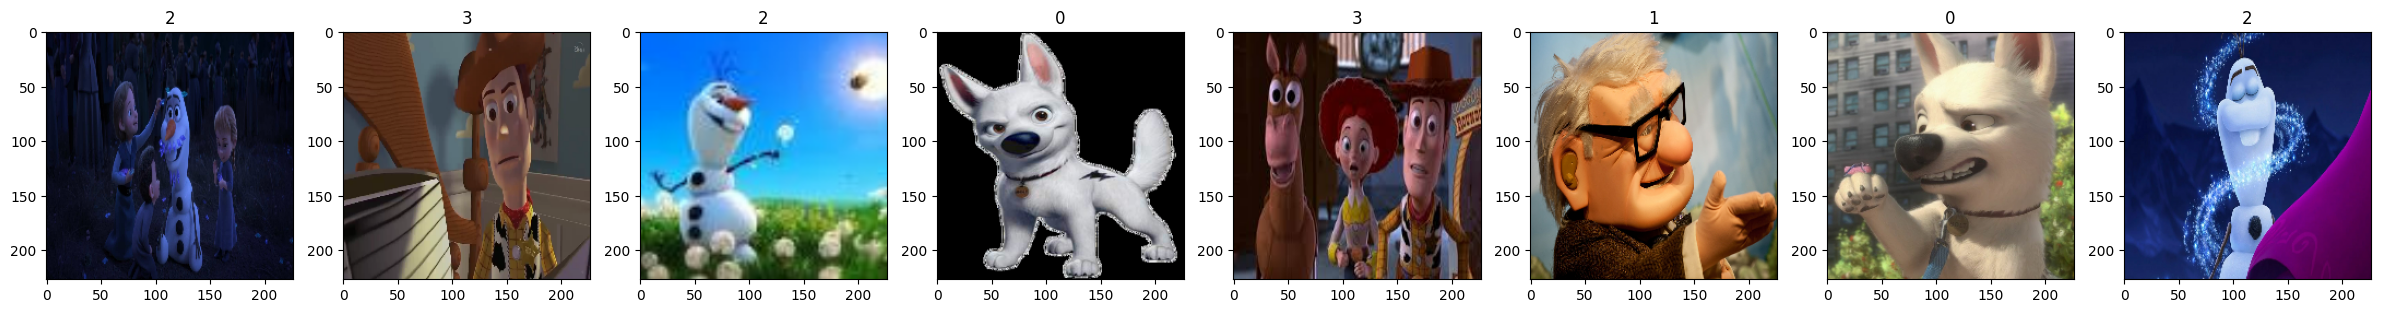

In [ ]:
fig, ax = plt.subplots(ncols=8, figsize=(30,30))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

NORMALISASI

In [ ]:
data = data.map(lambda x, y: (x/255.0, y))
print("Data type after normalization: {}".format(data.element_spec))
print("Data shape after normalization: {}".format(data.element_spec))
print("Jumlah data", len(data))

Data type after normalization: (TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Data shape after normalization: (TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Jumlah data 43


BAGI DATASET JADI 3 BAGIAN : TRAIN, VALIDASI, DAN TESTING

In [ ]:
train_size = int(0.8 * len(data))
val_size = int(0.1 * len(data))
test_size = int(0.1 * len(data))

print(train_size)
print(val_size)
print(test_size)

34
4
4


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

MODEL ALEXNET (STE)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
#inisisasi model kosong
model = Sequential()

In [ ]:
# Layer 1
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3), padding='valid'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

In [ ]:
# Layer 2
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

In [ ]:
# Layer 3
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))

In [ ]:
# Layer 4
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))

In [ ]:
# Layer 5
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

In [ ]:
# Flatten the output for the fully connected layers
model.add(Flatten())

In [ ]:
# Fully Connected Layer 1
model.add(Dense(512, activation='relu'))

# Fully Connected Layer 2
model.add(Dense(256, activation='relu'))

model.add(Dropout(0.2))

# Output Layer
model.add(Dense(4, activation='softmax'))

In [ ]:
#compile model dengan adamax optimizer
model.compile(optimizer='adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        153664    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 128)       1

In [ ]:
history = model.fit(train, validation_data=val, epochs=40)

Epoch 1/40
34/34 [==============================] - 84s 2s/step - loss: 1.3485 - accuracy: 0.3438 - val_loss: 1.3206 - val_accuracy: 0.3906
Epoch 2/40
34/34 [==============================] - 42s 1s/step - loss: 1.2593 - accuracy: 0.4173 - val_loss: 1.0813 - val_accuracy: 0.4844
Epoch 3/40
34/34 [==============================] - 40s 1s/step - loss: 1.1184 - accuracy: 0.4945 - val_loss: 1.2042 - val_accuracy: 0.4375
Epoch 4/40
34/34 [==============================] - 41s 1s/step - loss: 1.0433 - accuracy: 0.5533 - val_loss: 1.0423 - val_accuracy: 0.5156
Epoch 5/40
34/34 [==============================] - 52s 2s/step - loss: 0.9817 - accuracy: 0.5901 - val_loss: 0.8995 - val_accuracy: 0.6250
Epoch 6/40
34/34 [==============================] - 42s 1s/step - loss: 0.8458 - accuracy: 0.6434 - val_loss: 0.7999 - val_accuracy: 0.7344
Epoch 7/40
34/34 [==============================] - 41s 1s/step - loss: 0.7277 - accuracy: 0.7132 - val_loss: 0.6029 - val_accuracy: 0.7656
Epoch 8/40
34/34 [==

In [ ]:
import pandas as pd
#pip install openpyxl

# Convert the training history to a DataFrame
history_df = pd.DataFrame(history.history)

# Save the DataFrame to an Excel file
history_df.to_excel('/content/drive/My Drive/Colab Notebooks/History_ALEXNET_B_SB 4.xlsx', index=False)

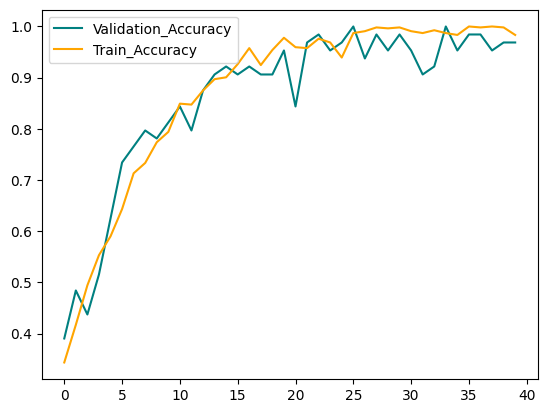

In [ ]:
fig = plt.figure()
plt.plot(history.history['val_accuracy'], color='teal', label='Validation_Accuracy')
plt.plot(history.history['accuracy'], color='orange', label='Train_Accuracy')
plt.legend(loc="upper left")
plt.show()

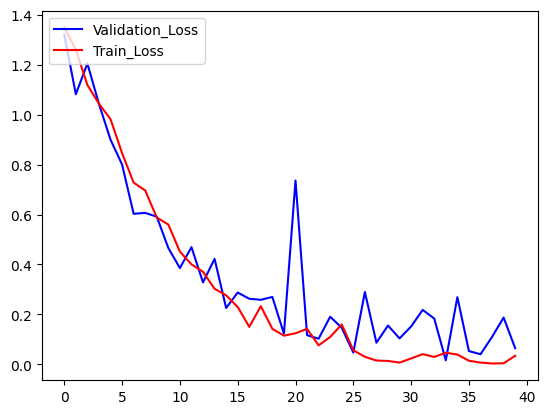

In [ ]:
fig = plt.figure()
plt.plot(history.history['val_loss'], color='blue', label='Validation_Loss')
plt.plot(history.history['loss'], color='red', label='Train_Loss')
plt.legend(loc="upper left")
plt.show()

In [ ]:
model.evaluate(test)

4/4 [==============================] - 10s 161ms/step - loss: 0.0415 - accuracy: 0.9844


[0.04151067137718201, 0.984375]

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/model_alexnet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
